# Data Cleaning

#### Load the energy data from the file assets/Energy Indicators.xls, which is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013, and should be put into a DataFrame with the variable name of Energy.

In [144]:
import xlrd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

file =r'assets/Energy Indicators.xls'
df = pd.read_excel(file)
#print(df2[df2['Country']=="Republic of Korea"])

#### we make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so we  should get rid of them, and we should change the column labels so that the columns are:

#### ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]

######Convert Energy Supply to gigajoules
######For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

In [145]:
df.drop(df.columns[[0,1]],axis=1,inplace=True)
df.columns=['Country','Energy Supply','Energy Supply per capita','% Renewable']
df2=df[17:]
print(len(df2))
df2.head(10)

265


,Country,Energy Supply,Energy Supply per capita,% Renewable
17,Afghanistan,321,10,78.6693
18,Albania,102,35,100
19,Algeria,1959,51,0.55101
20,American Samoa,...,...,0.641026
21,Andorra,9,121,88.6957
22,Angola,642,27,70.9091
23,Anguilla,2,136,0
24,Antigua and Barbuda,8,84,0
25,Argentina,3378,79,24.0645
26,Armenia,143,48,28.2361


### Renaming the following list of countries

"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong" 

In [146]:
df2.replace('Republic of Korea','South Korea', inplace = True)
df2.replace('United States of America','United States', inplace = True)
df2.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom', inplace = True)
df2.replace('China, Hong Kong Special Administrative Region','Hong Kong', inplace = True)

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [147]:
df2['Country'] = df2['Country'].str.replace(r"\(.*\)","")

<ipython-input-147-a9a5fd3016a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Country'] = df2['Country'].str.replace(r"\(.*\)","")


In [148]:
Energy=df2.replace(to_replace="^..+\.$",value="NaN",regex=True).reset_index()
Energy.head()

,index,Country,Energy Supply,Energy Supply per capita,% Renewable
0,17,Afghanistan,321,10,78.669280
1,18,Albania,102,35,100.000000
2,19,Algeria,1959,51,0.551010
3,20,American Samoa,NaN,NaN,0.641026
4,21,Andorra,9,121,88.695650


In [149]:
Energyy=Energy[Energy['Energy Supply']!="NaN"]['Energy Supply']*100000  
Energy['Energy Supply']=Energyy
Energy.head()

,index,Country,Energy Supply,Energy Supply per capita,% Renewable
0,17,Afghanistan,32100000,10,78.669280
1,18,Albania,10200000,35,100.000000
2,19,Algeria,195900000,51,0.551010
3,20,American Samoa,NaN,NaN,0.641026
4,21,Andorra,900000,121,88.695650


In [150]:
Energy.head()

,index,Country,Energy Supply,Energy Supply per capita,% Renewable
0,17,Afghanistan,32100000,10,78.669280
1,18,Albania,10200000,35,100.000000
2,19,Algeria,195900000,51,0.551010
3,20,American Samoa,NaN,NaN,0.641026
4,21,Andorra,900000,121,88.695650


In [151]:
#get the columns names
GDP=pd.read_csv('assets/world_bank.csv')
#GDP.columns=GDP
liste_columns=[]
for label, value in GDP.iloc[3].iteritems():
    liste_columns.append(GDP.iloc[3].loc[label])
#print(liste_columns)

In [152]:
GDP.columns=liste_columns
print(GDP.columns)

Index([  'Country Name',   'Country Code', 'Indicator Name', 'Indicator Code',
                 1960.0,           1961.0,           1962.0,           1963.0,
                 1964.0,           1965.0,           1966.0,           1967.0,
                 1968.0,           1969.0,           1970.0,           1971.0,
                 1972.0,           1973.0,           1974.0,           1975.0,
                 1976.0,           1977.0,           1978.0,           1979.0,
                 1980.0,           1981.0,           1982.0,           1983.0,
                 1984.0,           1985.0,           1986.0,           1987.0,
                 1988.0,           1989.0,           1990.0,           1991.0,
                 1992.0,           1993.0,           1994.0,           1995.0,
                 1996.0,           1997.0,           1998.0,           1999.0,
                 2000.0,           2001.0,           2002.0,           2003.0,
                 2004.0,           2005.0,          

In [153]:
GDP=GDP[4:]
GDP.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
4,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
5,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
6,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10


In [154]:
GDP['Country']=GDP['Country Name']

In [155]:
del GDP['Country Name']

In [156]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 

file = r'assets/scimagojr-3.xlsx'
ScimEn = pd.read_excel(file)
ScimEn.head(10)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [157]:

def merge():
    #print(GDP.columns)
    #print(Energy.columns)
    #print(ScimEn.columns)
    df = pd.merge(pd.merge(Energy, GDP, on='Country'), ScimEn, on='Country')
    df.set_index('Country',inplace=True)
    #print(len(df))
    df = df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per capita', '% Renewable', 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]]
    taf=df.sort_values(by='Rank', ascending=True)
    #print(len(taf.iloc[0:15 , :]))
    return taf.iloc[0:15 , :]
    
merge().shape

(15, 20)

#### "When we joined the datasets, but before we reduced this to the top 15 items, how many entries did we lose?"

In [158]:
def answer_two():
    df = pd.merge(pd.merge(Energy, GDP, on='Country'), ScimEn, on='Country')
    return len(df)-len(merge())
answer_two()

125

# phase d'analyse

In [238]:
dk=merge().reset_index()
len(dk)
dk['Country']

0     Russian Federation
1                 Canada
2                Germany
3                  India
4                 Brazil
5                 Turkey
6                 Norway
7                 Sweden
8               Malaysia
9                 Mexico
10                Poland
11                Greece
12               Belgium
13             Singapore
14               Finland
Name: Country, dtype: object

### This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order

In [160]:
def avgGDP():
    new_Tab=merge()[[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]]
    new_Tab['avg']=new_Tab[[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]].apply(lambda z: np.nanmean(z),axis=1)
    tab=new_Tab.sort_values(by='avg', ascending=False)
    return tab['avg']

avgGDP()


Country
Germany               3.493025e+12
Brazil                2.189794e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Mexico                1.090990e+12
Turkey                7.704245e+11
Sweden                4.960427e+11
Belgium               4.861437e+11
Poland                4.849714e+11
Norway                4.389348e+11
Greece                2.859894e+11
Malaysia              2.672205e+11
Finland               2.507356e+11
Singapore             2.388876e+11
Name: avg, dtype: float64

#### By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

In [161]:
def getchange():
    return avgGDP()[5]
getchange()

1090990419528.4371

In [162]:
merge().loc['Mexico'][2015]-merge().loc['Mexico'][2006]

206130371100.70996

In [163]:
def answer_four():
    Top15 = merge()
    Top15["AvgGDP"] = avgGDP()
    Top15.sort_values("AvgGDP", ascending=False, inplace=True)
    final = Top15.iloc[5][2015]
    initial = Top15.iloc[5][2006]
    return abs(final - initial)
answer_four()

206130371100.70996

#### the mean  energy per capita

In [164]:
def mean_energy():
  
    return merge()['Energy Supply per capita'].mean()
mean_energy()
    

157.0

In [165]:
def max_Rn():
    max_R=np.max(merge()['% Renewable'])
    df= merge()[merge()['% Renewable']==max_R]
    return ('Norway',max_R)
    #return df['% Renewable'].argmax(), df['% Renewable'].max()
max_Rn()

('Norway', 97.63558)

In [196]:
def ratio():
    dk=merge()
    total_citation=np.sum(dk['Citations'])
    dk['Ratio']=merge()['Self-citations']/total_citation
    df2=dk[dk['Ratio']==np.max(dk['Ratio'])].reset_index()
    df2.index=['Country_max']
    return (df2['Country'].get(key = 'Country_max') ,df2['Ratio'].get(key = 0))
    
ratio()

('Canada', 0.04288499842311452)

In [243]:
def answer_ten():
    Top15 = merge()
    reference = Top15["% Renewable"].median(axis=0)
    Top15["HighRenew"]=Top15.apply(lambda x: 1 if x["% Renewable"] > reference else 0, axis=1)
    return Top15["HighRenew"] 
answer_ten()


Country
Russian Federation    0
Canada                1
Germany               0
India                 0
Brazil                1
Turkey                1
Norway                1
Sweden                1
Malaysia              0
Mexico                0
Poland                0
Greece                1
Belgium               0
Singapore             0
Finland               1
Name: HighRenew, dtype: int64

In [216]:
def answer_eleven():
    Top15 = merge()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    groups = pd.DataFrame(columns = ['size', 'sum', 'mean', 'std'])
    Top15['Estimate Population'] = Top15['Energy Supply'] / Top15['Energy Supply per capita']
    
    for group, frame in Top15.groupby(ContinentDict):
        
        groups.loc[group] = [len(frame), frame['Estimate Population'].sum(),frame['Estimate Population'].mean(),frame['Estimate Population'].std()]
    return groups
answer_eleven()

,size,sum,mean,std
Asia,1.0,1.276731e+08,1.276731e+08,NaN
Europe,2.0,2.238697e+07,1.119348e+07,4.463987e+06
North America,1.0,3.523986e+06,3.523986e+06,NaN
South America,1.0,2.059153e+07,2.059153e+07,NaN


In [206]:
answer_eleven().shape[1]

4

In [240]:
def answer_thirteen():
    Top15 = merge()
    Top15["Population"] = Top15['Energy Supply'] / Top15['Energy Supply per capita']
    #Top15["Population"] = Top15["Population"]
    
    return Top15['Population'].apply(lambda x: '{0:,}'.format(x))
answer_thirteen()


Country
Russian Federation            14,350,000.0
Canada                3,523,986.4864864866
Germany                8,036,969.696969697
India                 127,673,076.92307693
Brazil                20,591,525.423728812
Turkey                         7,651,562.5
Norway                  508,424.9084249084
Sweden                  964,150.9433962264
Malaysia              2,945,689.6551724137
Mexico                        12,412,500.0
Poland                3,851,401.8691588785
Greece                1,103,333.3333333333
Belgium               1,113,333.3333333333
Singapore               541,062.8019323671
Finland                 545,238.0952380953
Name: Population, dtype: object

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


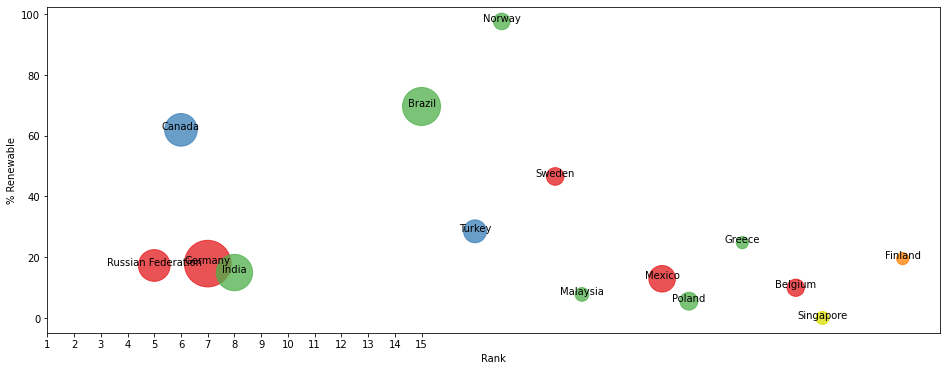

In [242]:
def plot_optional():
    import matplotlib as plt
    get_ipython().magic('matplotlib inline')
    Top15 = merge()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15[2014]/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.")


# In[55]:

plot_optional()